**Mathed-filtering техника и генерирање на податочното множество од официјалните настани - втор дел**

In [1]:
! pip install -q 'lalsuite==7.11' 'PyCBC==2.0.5'

In [2]:
import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
import pycbc.catalog
import numpy as np
import pandas as pd
from pycbc.waveform import get_td_waveform
import pycbc.catalog
from pycbc.types import TimeSeries
from pycbc.psd import interpolate, inverse_spectrum_truncation
import os
from pycbc.filter import matched_filter
from pycbc.filter import sigma

In [3]:
GWTC1_events = ["GW150914", "GW151012", "GW151226", "GW170104", "GW170608", "GW170729", "GW170809", "GW170814", "GW170817",
               "GW170818", "GW170823"]

In [4]:
GWTC2_1_events = ["GW190403_051519", "GW190408_181802", "GW190412", "GW190413_052954", "GW190413_134308", "GW190421_213856",
                 "GW190425", "GW190426_190642", "GW190503_185404", "GW190512_180714", "GW190513_205428", "GW190514_065416",
                 "GW190517_055101", "GW190519_153544", "GW190521", "GW190521_074359", "GW190527_092055", "GW190602_175927",
                 "GW190620_030421", "GW190630_185205", "GW190701_203306", "GW190706_222641", "GW190707_093326",
                 "GW190708_232457", "GW190719_215514", "GW190720_000836", "GW190725_174728", "GW190727_060333",
                 "GW190728_064510", "GW190731_140936", "GW190803_022701", "GW190805_211137", "GW190814", "GW190828_063405",
                 "GW190828_065509", "GW190910_112807", "GW190915_235702", "GW190916_200658", "GW190917_114630", "GW190924_021846",
                 "GW190925_232845", "GW190926_050336", "GW190929_012149", "GW190930_133541"]

In [5]:
GWTC3_events = ["GW191103_012549", "GW191105_143521", "GW191109_010717", "GW191113_071753", "GW191126_115259", "GW191127_050227",
               "GW191129_134029", "GW191204_110529", "GW191204_171526", "GW191215_223052", "GW191216_213338", "GW191219_163120",
               "GW191222_033537", "GW191230_180458", "GW200112_155838", "GW200115_042309", "GW200128_022011", "GW200129_065458",
               "GW200202_154313", "GW200208_130117", "GW200208_222617", "GW200209_085452", "GW200210_092254", "GW200216_220804",
               "GW200219_094415", "GW200220_061928", "GW200220_124850", "GW200224_222234", "GW200225_060421", "GW200302_015811",
               "GW200306_093714", "GW200308_173609", "GW200311_115853", "GW200316_215756", "GW200322_091133"]

In [6]:
strain_H_data = []
strain_L_data = []
strain_V_data = []

In [7]:
# nizi vo koi kje se chuvaat samo iminjata na nastanite detektirani kaj soodvetniot detektor
events_H = []
events_L = []
events_V = []

In [8]:
for gwtc1_event in GWTC1_events:
    merger = pycbc.catalog.Merger(gwtc1_event, source='gwtc-1')
    strain_H = merger.strain('H1')
    strain_L = merger.strain('L1')
    
    strain_H = highpass(strain_H, 15.0)
    strain_H = resample_to_delta_t(strain_H, 1.0/2048)
    strain_L = highpass(strain_L, 15.0)
    strain_L = resample_to_delta_t(strain_L, 1.0/2048)
    
    if gwtc1_event in ["GW150914", "GW151012", "GW151226", "GW170104", "GW170608", "GW170823"]: #za ovie nastani nema raboteno Virgo detektorot
        strain_V_array = np.full(65536, np.nan)
        strain_V_data.append(strain_V_array)
    else:
        strain_V = merger.strain('V1')
        strain_V = highpass(strain_V, 15.0)
        strain_V = resample_to_delta_t(strain_V, 1.0/2048)
        strain_V_array = strain_V.numpy()
        strain_V_data.append(strain_V_array)
        events_V.append(gwtc1_event)
    
    strain_H_array = strain_H.numpy()
    strain_H_data.append(strain_H_array)
    strain_L_array = strain_L.numpy()
    strain_L_data.append(strain_L_array)
    events_H.append(gwtc1_event)
    events_L.append(gwtc1_event)

In [9]:
for gwtc2_1_event in GWTC2_1_events:
    merger = pycbc.catalog.Merger(gwtc2_1_event, source='gwtc-2.1')
    
    if gwtc2_1_event in ["GW190425", "GW190620_030421", "GW190630_185205", "GW190708_232457",
                        "GW190910_112807"]:
        strain_H_array = np.full(65536, np.nan)
        strain_H_data.append(strain_H_array)
    else:
        strain_H = merger.strain('H1')
        strain_H = highpass(strain_H, 15.0)
        strain_H = resample_to_delta_t(strain_H, 1.0/2048)
        strain_H_array = strain_H.numpy()
        strain_H_data.append(strain_H_array)
        events_H.append(gwtc2_1_event)
        
    if gwtc2_1_event in ["GW190925_232845"]:
        strain_L_array = np.full(65536, np.nan)
        strain_L_data.append(strain_L_array)
    else:
        strain_L = merger.strain('L1')
        strain_L = highpass(strain_L, 15.0)
        strain_L = resample_to_delta_t(strain_L, 1.0/2048)
        strain_L_array = strain_L.numpy()
        strain_L_data.append(strain_L_array)
        events_L.append(gwtc2_1_event)
        
    if gwtc2_1_event in ["GW190403_051519", "GW190413_052954", "GW190421_213856", "GW190426_190642", "GW190514_065416", "GW190521_074359",
                        "GW190527_092055", "GW190707_093326", "GW190719_215514", "GW190731_140936",
                        "GW190805_211137", "GW190930_133541"]:
        strain_V_array = np.full(65536, np.nan)
        strain_V_data.append(strain_V_array)
    else:
        strain_V = merger.strain('V1')
        strain_V = highpass(strain_V, 15.0)
        strain_V = resample_to_delta_t(strain_V, 1.0/2048)
        strain_V_array = strain_V.numpy()
        strain_V_data.append(strain_V_array)
        events_V.append(gwtc2_1_event)

In [10]:
for gwtc3_event in GWTC3_events:
    merger = pycbc.catalog.Merger(gwtc3_event, source='gwtc-3')
    
    if gwtc3_event in ["GW200112_155838"]:
        strain_H_array = np.full(65536, np.nan)
        strain_H_data.append(strain_H_array)
    else:
        strain_H = merger.strain('H1')
        strain_H = highpass(strain_H, 15.0)
        strain_H = resample_to_delta_t(strain_H, 1.0/2048)
        strain_H_array = strain_H.numpy()
        strain_H_data.append(strain_H_array)
        events_H.append(gwtc3_event)
    
    if gwtc3_event in ["GW191216_213338", "GW200302_015811"]:
        strain_L_array = np.full(65536, np.nan)
        strain_L_data.append(strain_L_array)
    else:
        strain_L = merger.strain('L1')
        strain_L = highpass(strain_L, 15.0)
        strain_L = resample_to_delta_t(strain_L, 1.0/2048)
        strain_L_array = strain_L.numpy()
        strain_L_data.append(strain_L_array)
        events_L.append(gwtc3_event)
    
    if gwtc3_event in ["GW191103_012549", "GW191109_010717", "GW191126_115259", "GW191129_134029",
                      "GW191204_110529", "GW191204_171526", "GW191222_033537", "GW200128_022011",
                      "GW200220_124850", "GW200225_060421", "GW200306_093714"]:
        strain_V_array = np.full(65536, np.nan)
        strain_V_data.append(strain_V_array)
    else:
        strain_V = merger.strain('V1')
        strain_V = highpass(strain_V, 15.0)
        strain_V = resample_to_delta_t(strain_V, 1.0/2048)
        strain_V_array = strain_V.numpy()
        strain_V_data.append(strain_V_array)
        events_V.append(gwtc3_event)

In [11]:
# primer H data za prviot nastan GW150914
df = pd.DataFrame({'Strain Hanford': strain_H_data[0]})
print(df)

       Strain Hanford
0        1.453261e-19
1        1.320747e-19
2       -1.742559e-20
3       -5.972212e-21
4       -1.466701e-20
...               ...
65531   -3.342500e-20
65532   -1.772582e-20
65533   -4.777186e-20
65534    6.208833e-20
65535    7.413966e-20

[65536 rows x 1 columns]


In [12]:
# onamu kade shto soodvetniot detektor nema detektirano podatoci nema vrednosti (pr. Virgo za GW150914)
df = pd.DataFrame({'Strain Virgo': strain_V_data[0]})
print(df)

       Strain Virgo
0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
...             ...
65531           NaN
65532           NaN
65533           NaN
65534           NaN
65535           NaN

[65536 rows x 1 columns]


In [13]:
# broj na NaN vrednosti kaj sekoj detektor 
total_nan_count_H = 0

for array in strain_H_data:
    nan_count = np.isnan(array).sum()
    total_nan_count_H += nan_count
    
print("Total NaN values for Hanford:", total_nan_count_H)

Total NaN values for Hanford: 393216


In [14]:
total_nan_count_L = 0

for array in strain_L_data:
    nan_count = np.isnan(array).sum()
    total_nan_count_L += nan_count
    
print("Total NaN values for Livingston:", total_nan_count_L)

Total NaN values for Livingston: 196608


In [15]:
total_nan_count_V = 0

for array in strain_V_data:
    nan_count = np.isnan(array).sum()
    total_nan_count_V += nan_count
    
print("Total NaN values for Virgo:", total_nan_count_V)

Total NaN values for Virgo: 1966080


In [16]:
# otstranuvanje na NaN vrednostite kaj sekoj detektor
strain_H_data = [array for array in strain_H_data if not np.isnan(array).any()]
strain_L_data = [array for array in strain_L_data if not np.isnan(array).any()]
strain_V_data = [array for array in strain_V_data if not np.isnan(array).any()]

In [17]:
# primer pechatenje na prvata niza od strain_V_data (prethodno imashe NaN vrednosti bidejkji se odnesuvashe na GW150914, sega ima strain vrednosti bidejkji prvata niza se odnesuva na prviot detektiran nastan od Virgo - GW170729)
df = pd.DataFrame({'Strain Virgo': strain_V_data[0]})
print(df)

       Strain Virgo
0      5.062847e-20
1      4.969471e-20
2      8.943258e-20
3      8.467210e-20
4      4.074078e-20
...             ...
65531 -4.674303e-19
65532 -4.840258e-19
65533 -4.947237e-19
65534 -4.258690e-19
65535 -2.186044e-19

[65536 rows x 1 columns]


In [18]:
#za chuvanje na strain+labels od sekoj detektor (labels mozhe da se noise; noise+BBH; noise+BNS; noise+NSBH)
label_H = []
label_L = []
label_V = []

In [21]:
#GW200208_222617
#H
strain_H_event = TimeSeries(strain_H_data[69], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 51
m2 = 12
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 24.6474609375s with SNR 4.3972809032821365


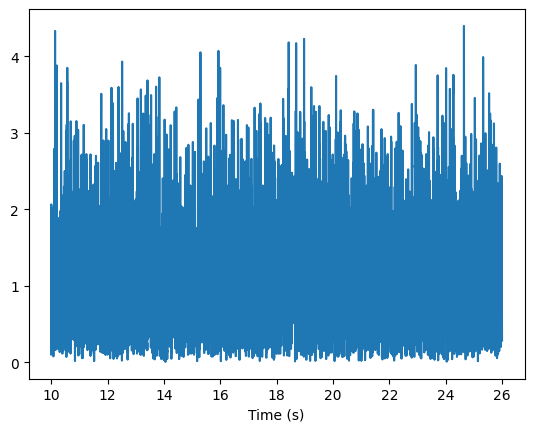

In [22]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [24]:
#GW200208_222617
#L
strain_L_event = TimeSeries(strain_L_data[73], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 51
m2 = 12
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=15)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 10.65771484375s with SNR 4.675062242951547


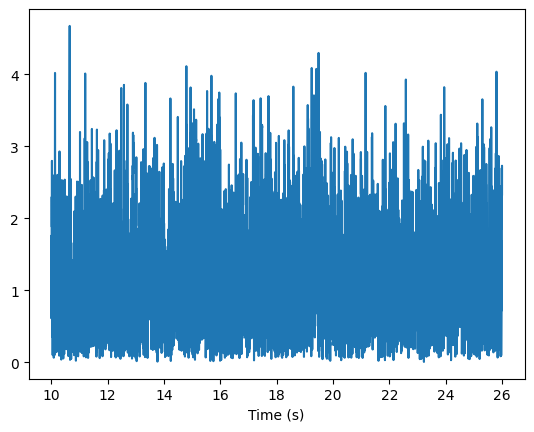

In [25]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [30]:
#GW200208_222617
#V
strain_V_event = TimeSeries(strain_V_data[49], delta_t=1.0/2048)
strain_V_event = strain_V_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_V_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_V_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_V_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 51
m2 = 12
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_V_event.delta_t,
                     f_lower=15)
hp.resize(len(strain_V_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_V_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_V_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_V_event.start_time
subtracted = strain_V_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_V_values = []
strain_V_event_array = np.array(strain_V_event)


A signal was found at 18.6064453125s with SNR 4.383455525943414


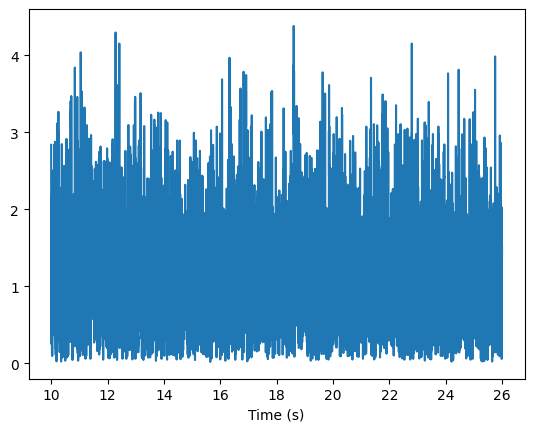

In [31]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

Сигналот се отфрла.

In [32]:
#GW200209_085452
#H
strain_H_event = TimeSeries(strain_H_data[70], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 36
m2 = 27
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 15.1748046875s with SNR 6.664770608314455


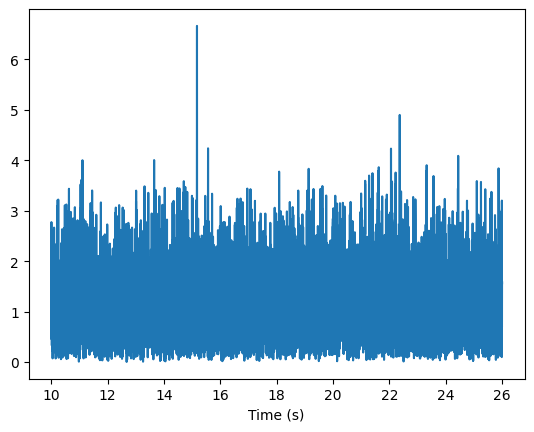

In [33]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [34]:
for value_strain, value_snr in zip(strain_H_event_array, snr_values):
    if value_snr >= 5:
        label_H_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_H_values.append((value_strain, "noise"))
label_H.append(label_H_values)

In [36]:
data = label_H[0]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_H', float), ('Label', 'U10')])
np.save('GW200209_085452_H_data.npy', structured_array)

In [37]:
#GW200209_085452
#L
strain_L_event = TimeSeries(strain_L_data[74], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 36
m2 = 27
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 12.611328125s with SNR 5.510803466496065


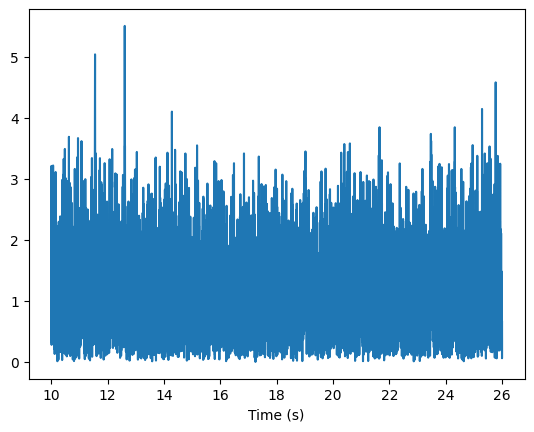

In [38]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [39]:
#GW200209_085452
#V
strain_V_event = TimeSeries(strain_V_data[50], delta_t=1.0/2048)
strain_V_event = strain_V_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_V_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_V_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_V_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 36
m2 = 27
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_V_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_V_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_V_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_V_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_V_event.start_time
subtracted = strain_V_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_V_values = []
strain_V_event_array = np.array(strain_V_event)


A signal was found at 14.4033203125s with SNR 4.318972573626886


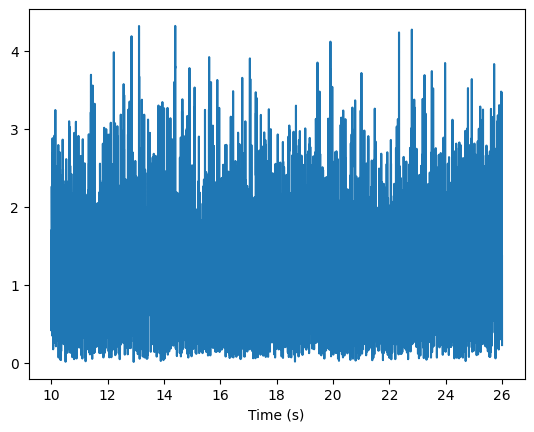

In [40]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

GW200210_092254 - овој настан во официјалниот каталог не е назначен како ниту еден од типовите на сигнали бидејќи масата на второто тело е 2.83 соларни маси, што не спаѓа во соодветните граници за црни дупки и неутронски ѕвезди, па се отфрла поради можноста за невалидно лабелирање од астрофизички аспект.

In [43]:
#GW200216_220804
#H
strain_H_event = TimeSeries(strain_H_data[72], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 51
m2 = 30
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 15.88037109375s with SNR 5.304872172961029


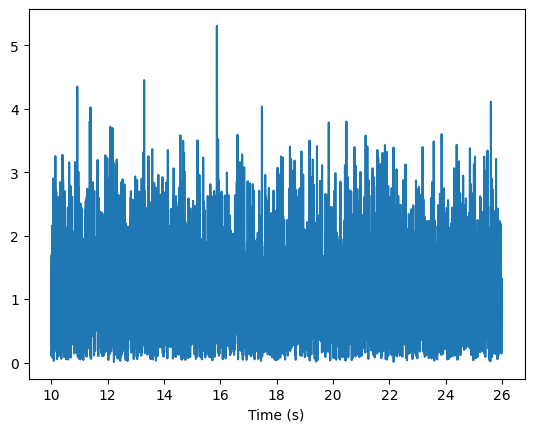

In [44]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [45]:
for value_strain, value_snr in zip(strain_H_event_array, snr_values):
    if value_snr >= 4.5:
        label_H_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_H_values.append((value_strain, "noise"))
label_H.append(label_H_values)

In [47]:
data = label_H[1]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_H', float), ('Label', 'U10')])
np.save('GW200216_220804_H_data.npy', structured_array)

In [48]:
#GW200216_220804
#L
strain_L_event = TimeSeries(strain_L_data[76], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 51
m2 = 30
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 13.43359375s with SNR 4.427910221696927


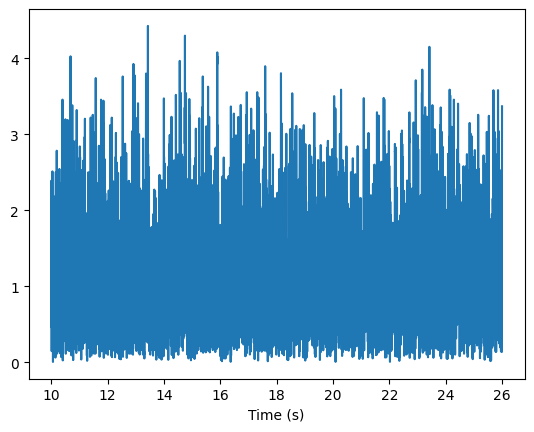

In [49]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [50]:
#GW200216_220804
#V
strain_V_event = TimeSeries(strain_V_data[52], delta_t=1.0/2048)
strain_V_event = strain_V_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_V_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_V_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_V_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 51
m2 = 30
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_V_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_V_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_V_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_V_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_V_event.start_time
subtracted = strain_V_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_V_values = []
strain_V_event_array = np.array(strain_V_event)


A signal was found at 19.73486328125s with SNR 4.17119060970589


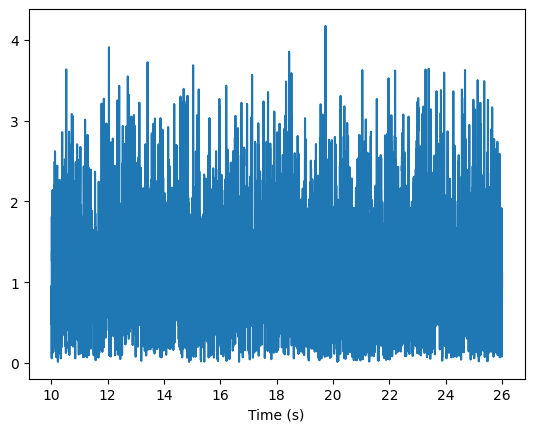

In [51]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [54]:
#GW200219_094415
#H
strain_H_event = TimeSeries(strain_H_data[73], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 38
m2 = 28
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 12.47412109375s with SNR 4.8152091352766115


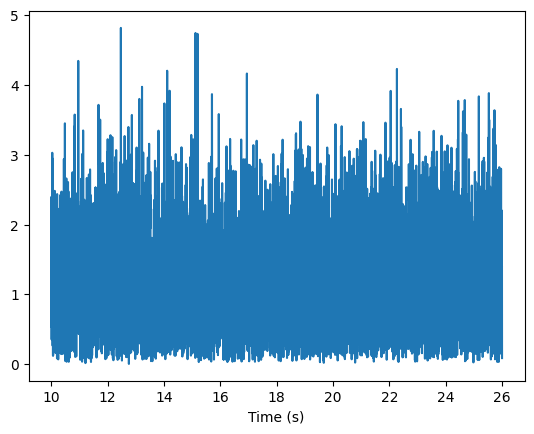

In [55]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [56]:
#GW200219_094415
#L
strain_L_event = TimeSeries(strain_L_data[77], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 38
m2 = 28
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 15.19970703125s with SNR 5.365037103499291


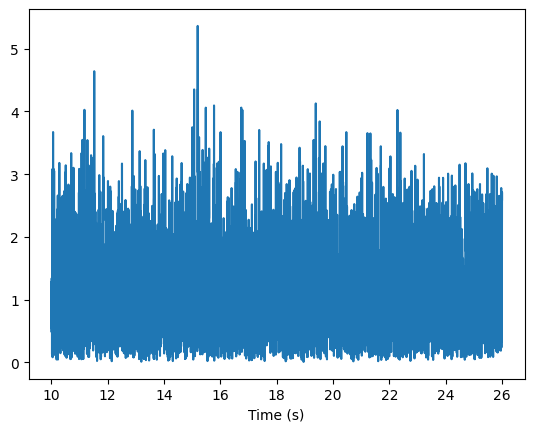

In [57]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [58]:
for value_strain, value_snr in zip(strain_L_event_array, snr_values):
    if value_snr >= 5:
        label_L_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_L_values.append((value_strain, "noise"))
label_L.append(label_L_values)

In [60]:
data = label_L[0]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_L', float), ('Label', 'U10')])
np.save('GW200219_094415_L_data.npy', structured_array)

In [61]:
#GW200219_094415
#V
strain_V_event = TimeSeries(strain_V_data[53], delta_t=1.0/2048)
strain_V_event = strain_V_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_V_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_V_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_V_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 38
m2 = 28
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_V_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_V_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_V_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_V_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_V_event.start_time
subtracted = strain_V_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_V_values = []
strain_V_event_array = np.array(strain_V_event)


A signal was found at 25.60888671875s with SNR 4.231650647965585


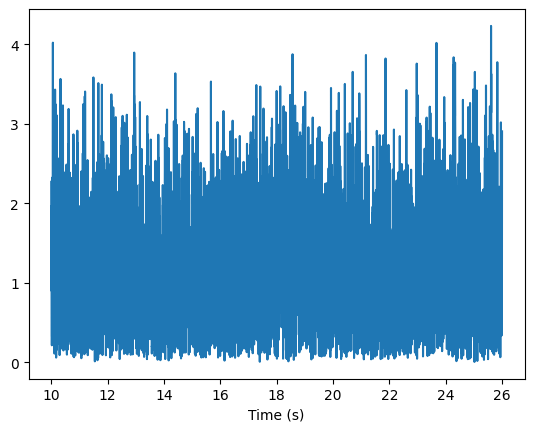

In [62]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [65]:
#GW200220_061928
#H
strain_H_event = TimeSeries(strain_H_data[74], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 87
m2 = 61
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=10)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 18.16845703125s with SNR 4.591865413518706


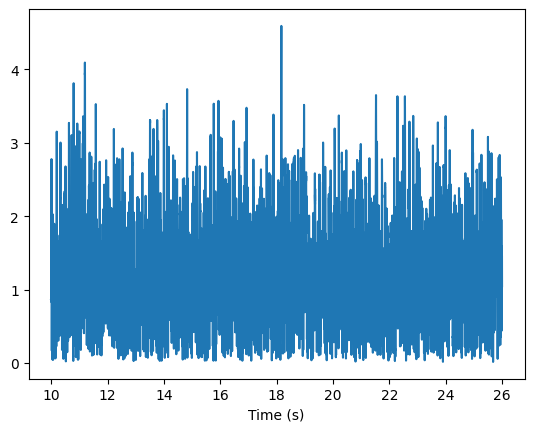

In [66]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [67]:
#GW200220_061928
#L
strain_L_event = TimeSeries(strain_L_data[78], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 87
m2 = 61
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=10)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 15.64794921875s with SNR 5.092245763235817


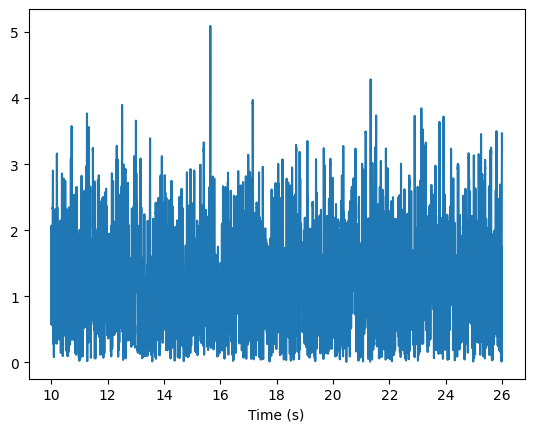

In [68]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [69]:
for value_strain, value_snr in zip(strain_L_event_array, snr_values):
    if value_snr >= 4.5:
        label_L_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_L_values.append((value_strain, "noise"))
label_L.append(label_L_values)

In [71]:
data = label_L[1]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_L', float), ('Label', 'U10')])
np.save('GW200220_061928_L_data.npy', structured_array)

In [72]:
#GW200220_061928
#V
strain_V_event = TimeSeries(strain_V_data[54], delta_t=1.0/2048)
strain_V_event = strain_V_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_V_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_V_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_V_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 87
m2 = 61
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_V_event.delta_t,
                     f_lower=10)
hp.resize(len(strain_V_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_V_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_V_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_V_event.start_time
subtracted = strain_V_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_V_values = []
strain_V_event_array = np.array(strain_V_event)


A signal was found at 23.9765625s with SNR 4.641366963471488


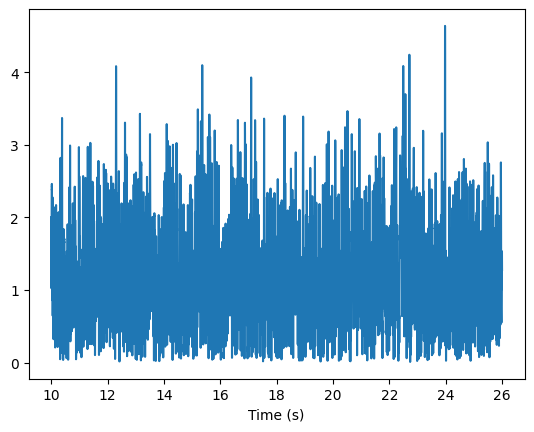

In [73]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [79]:
#GW200220_124850
#H
strain_H_event = TimeSeries(strain_H_data[75], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 39
m2 = 28
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 20.34521484375s with SNR 2440.5159711874453


Се отфрла поради невалидност.

In [80]:
#GW200220_124850
#L
strain_L_event = TimeSeries(strain_L_data[79], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 39
m2 = 28
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 23.08447265625s with SNR 4.3862567050447065


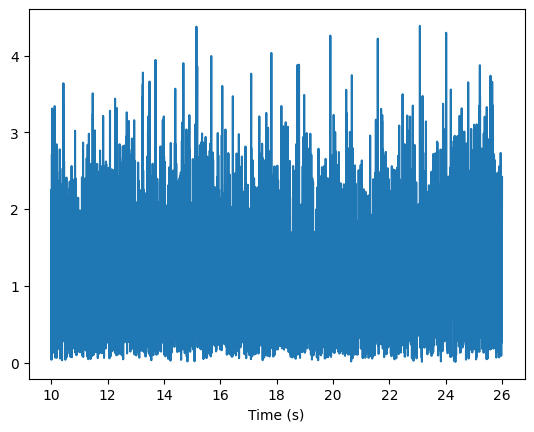

In [81]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

Се отфрла целосно настанот.

In [82]:
#GW200224_222234
#H
strain_H_event = TimeSeries(strain_H_data[76], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 40
m2 = 33
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 15.400390625s with SNR 10.22694187290813


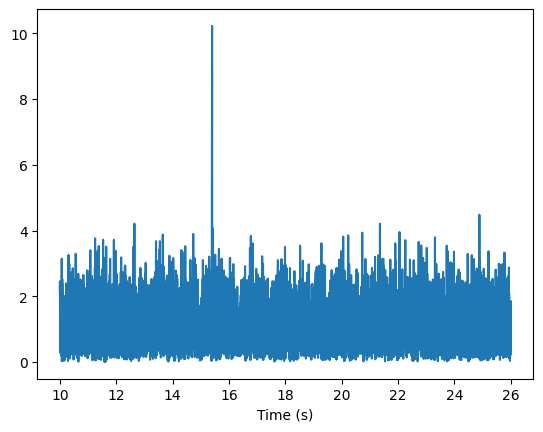

In [83]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [84]:
for value_strain, value_snr in zip(strain_H_event_array, snr_values):
    if value_snr >= 5:
        label_H_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_H_values.append((value_strain, "noise"))
label_H.append(label_H_values)

In [86]:
data = label_H[2]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_H', float), ('Label', 'U10')])
np.save('GW200224_222234_H_data.npy', structured_array)

In [87]:
#GW200224_222234
#L
strain_L_event = TimeSeries(strain_L_data[80], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 40
m2 = 33
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 15.3984375s with SNR 10.671946594186771


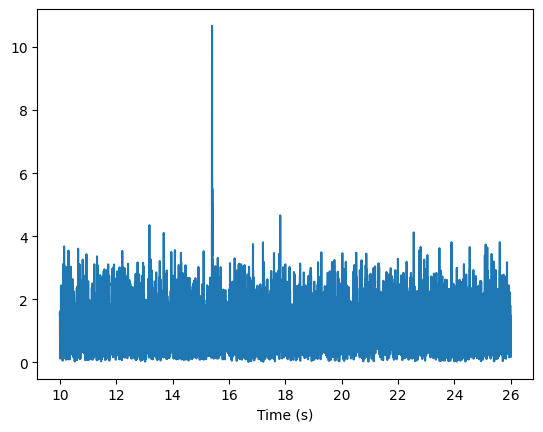

In [88]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [89]:
for value_strain, value_snr in zip(strain_L_event_array, snr_values):
    if value_snr >= 5:
        label_L_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_L_values.append((value_strain, "noise"))
label_L.append(label_L_values)

In [91]:
data = label_L[2]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_L', float), ('Label', 'U10')])
np.save('GW200224_222234_L_data.npy', structured_array)

In [92]:
#GW200224_222234
#V
strain_V_event = TimeSeries(strain_V_data[55], delta_t=1.0/2048)
strain_V_event = strain_V_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_V_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_V_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_V_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 40
m2 = 33
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_V_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_V_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_V_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_V_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_V_event.start_time
subtracted = strain_V_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_V_values = []
strain_V_event_array = np.array(strain_V_event)


A signal was found at 20.98583984375s with SNR 5.8042352157297845


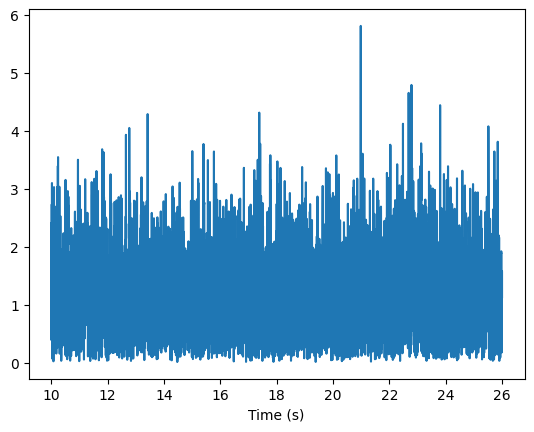

In [93]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [94]:
for value_strain, value_snr in zip(strain_V_event_array, snr_values):
    if value_snr >= 5:
        label_V_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_V_values.append((value_strain, "noise"))
label_V.append(label_V_values)

In [96]:
data = label_V[0]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_V', float), ('Label', 'U10')])
np.save('GW200224_222234_V_data.npy', structured_array)

In [97]:
#GW200225_060421
#H
strain_H_event = TimeSeries(strain_H_data[77], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 19
m2 = 14
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 11.99560546875s with SNR 4.724350171087995


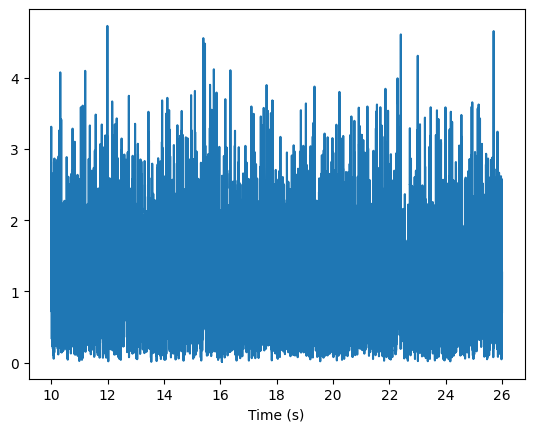

In [98]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [105]:
#GW200225_060421
#L
strain_L_event = TimeSeries(strain_L_data[81], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 19
m2 = 14
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 15.521484375s with SNR 5.638642629509295


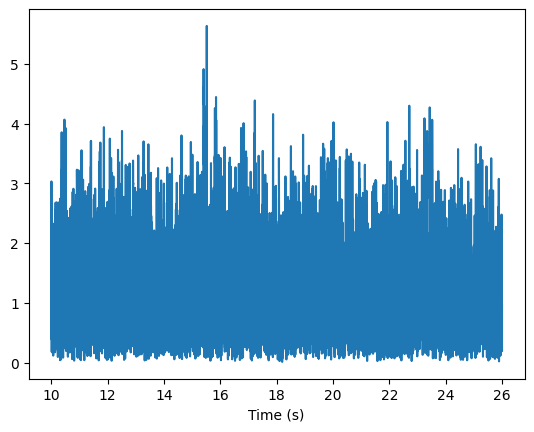

In [106]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [107]:
for value_strain, value_snr in zip(strain_L_event_array, snr_values):
    if value_snr >= 4.5:
        label_L_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_L_values.append((value_strain, "noise"))
label_L.append(label_L_values)

In [109]:
data = label_L[3]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_L', float), ('Label', 'U10')])
np.save('GW200225_060421_L_data.npy', structured_array)

In [110]:
#GW200302_015811
#H
strain_H_event = TimeSeries(strain_H_data[78], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 38
m2 = 20
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 15.5166015625s with SNR 7.847018827498219


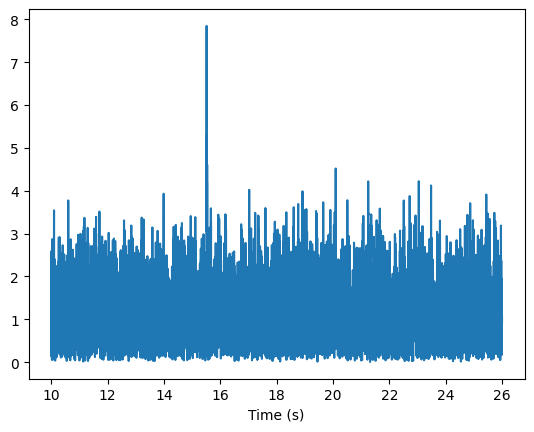

In [111]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [112]:
for value_strain, value_snr in zip(strain_H_event_array, snr_values):
    if value_snr >= 5:
        label_H_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_H_values.append((value_strain, "noise"))
label_H.append(label_H_values)

In [114]:
data = label_H[3]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_H', float), ('Label', 'U10')])
np.save('GW200302_015811_H_data.npy', structured_array)

In [115]:
#GW200302_015811
#V
strain_V_event = TimeSeries(strain_V_data[56], delta_t=1.0/2048)
strain_V_event = strain_V_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_V_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_V_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_V_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 38
m2 = 20
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_V_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_V_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_V_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_V_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_V_event.start_time
subtracted = strain_V_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_V_values = []
strain_V_event_array = np.array(strain_V_event)


A signal was found at 24.06396484375s with SNR 4.678334602069502


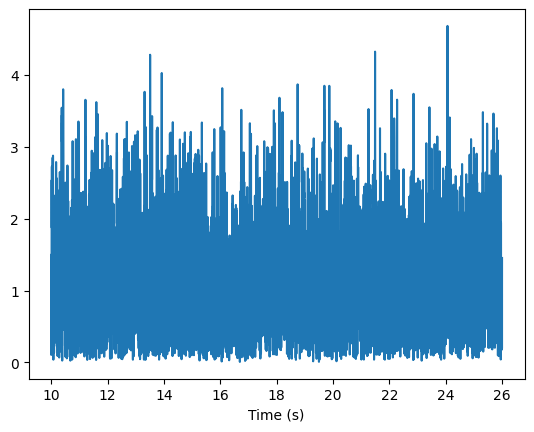

In [116]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [121]:
#GW200306_093714
#H
strain_H_event = TimeSeries(strain_H_data[79], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 28
m2 = 15
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 23.25390625s with SNR 4.625568138403948


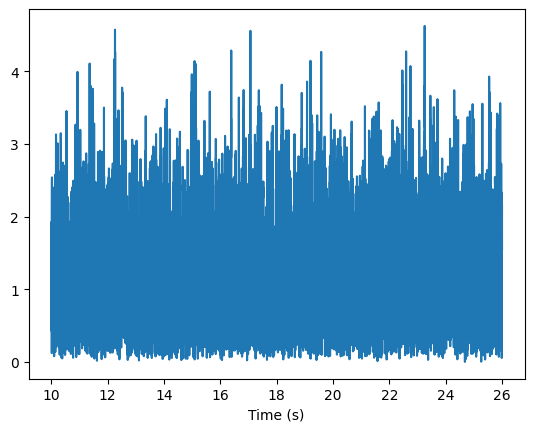

In [122]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [123]:
#GW200306_093714
#L
strain_L_event = TimeSeries(strain_L_data[82], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 28
m2 = 15
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 24.7626953125s with SNR 4.222739723707266


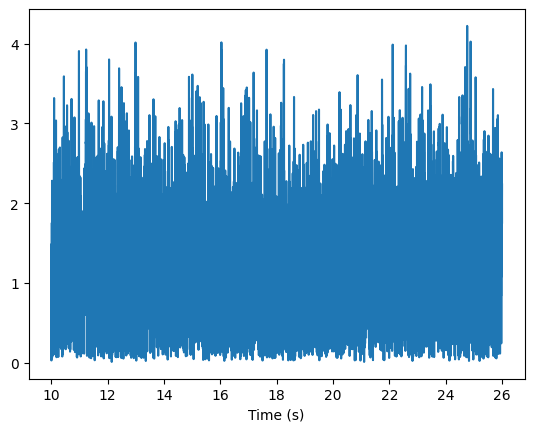

In [124]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

Настанот се отфрла.

In [126]:
#GW200308_173609
#H
strain_H_event = TimeSeries(strain_H_data[80], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 36
m2 = 14
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=15)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 18.583984375s with SNR 4.651924009453241


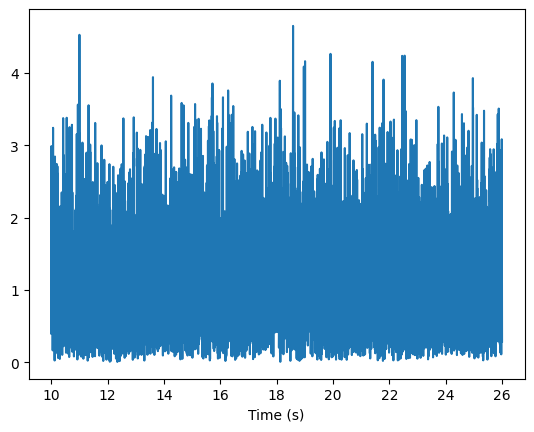

In [127]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [136]:
#GW200308_173609
#L
strain_L_event = TimeSeries(strain_L_data[83], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 36
m2 = 14
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 19.9140625s with SNR 79.58581010815627


Се отфрла сигналот поради неконзистентност.

In [137]:
#GW200308_173609
#V
strain_V_event = TimeSeries(strain_V_data[57], delta_t=1.0/2048)
strain_V_event = strain_V_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_V_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_V_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_V_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 36
m2 = 14
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_V_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_V_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_V_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_V_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_V_event.start_time
subtracted = strain_V_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_V_values = []
strain_V_event_array = np.array(strain_V_event)


A signal was found at 23.9228515625s with SNR 4.178243042578139


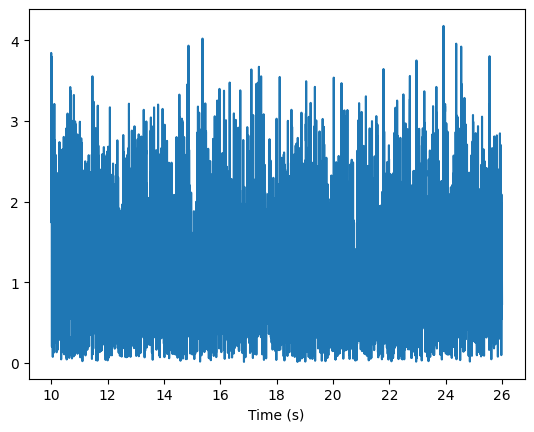

In [138]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

Се отфрла настанот.

In [139]:
#GW200311_115853
#H
strain_H_event = TimeSeries(strain_H_data[81], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 34
m2 = 28
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 15.39453125s with SNR 10.628399778148863


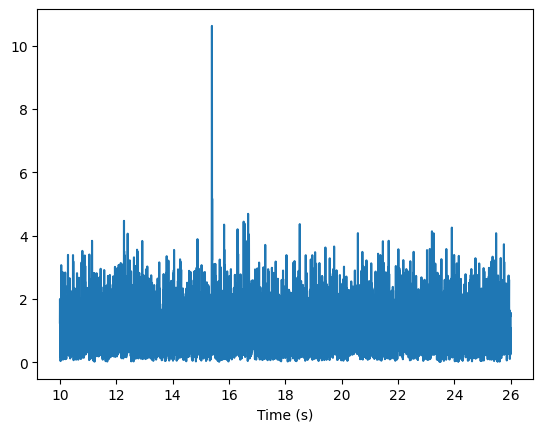

In [140]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [141]:
for value_strain, value_snr in zip(strain_H_event_array, snr_values):
    if value_snr >= 5:
        label_H_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_H_values.append((value_strain, "noise"))
label_H.append(label_H_values)

In [143]:
data = label_H[4]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_H', float), ('Label', 'U10')])
np.save('GW200311_115853_H_data.npy', structured_array)

In [144]:
#GW200311_115853
#L
strain_L_event = TimeSeries(strain_L_data[84], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 34
m2 = 28
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 15.3876953125s with SNR 8.423139351084476


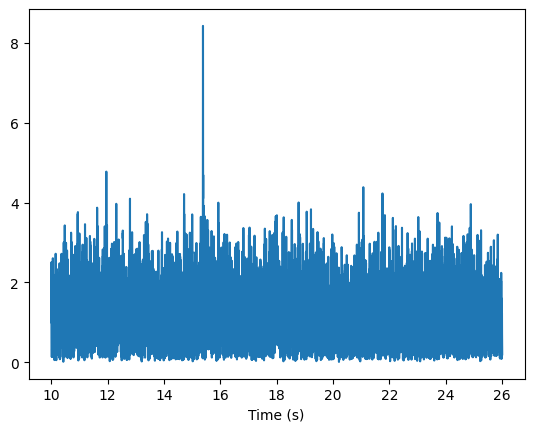

In [145]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [146]:
for value_strain, value_snr in zip(strain_L_event_array, snr_values):
    if value_snr >= 5:
        label_L_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_L_values.append((value_strain, "noise"))
label_L.append(label_L_values)

In [148]:
data = label_L[4]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_L', float), ('Label', 'U10')])
np.save('GW200311_115853_L_data.npy', structured_array)

In [149]:
#GW200311_115853
#V
strain_V_event = TimeSeries(strain_V_data[58], delta_t=1.0/2048)
strain_V_event = strain_V_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_V_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_V_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_V_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 34
m2 = 28
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_V_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_V_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_V_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_V_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_V_event.start_time
subtracted = strain_V_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_V_values = []
strain_V_event_array = np.array(strain_V_event)


A signal was found at 12.09912109375s with SNR 4.73405783987925


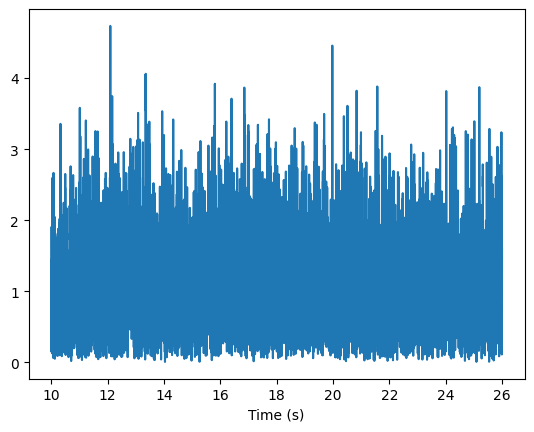

In [150]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [153]:
#GW200316_215756
#H
strain_H_event = TimeSeries(strain_H_data[82], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 13
m2 = 8
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 10.4765625s with SNR 4.788734869971908


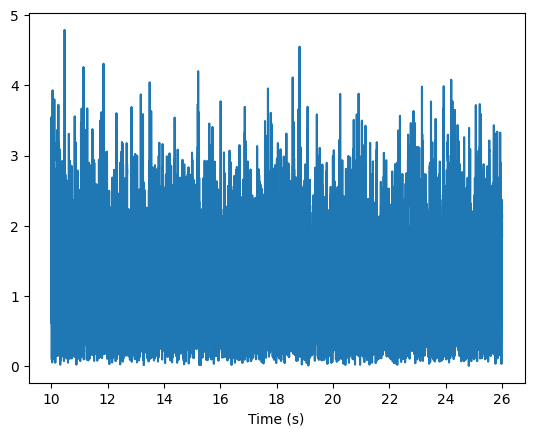

In [154]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [155]:
#GW200316_215756
#L
strain_L_event = TimeSeries(strain_L_data[85], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 13
m2 = 8
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 10.376953125s with SNR 4.814591613911345


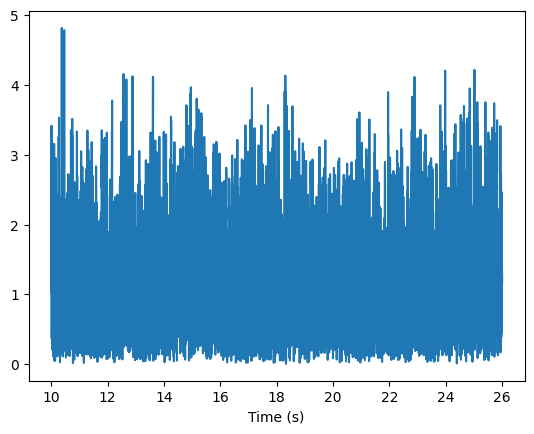

In [156]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [157]:
for value_strain, value_snr in zip(strain_L_event_array, snr_values):
    if value_snr >= 4.5:
        label_L_values.append((value_strain, "noise+BBH")) #se oznachuvaat kako shum+signal samo onie strain vrednosti so snr nad 5
    else: 
        label_L_values.append((value_strain, "noise"))
label_L.append(label_L_values)

In [159]:
data = label_L[5]
strain_values = [item[0] for item in data]
labels = [item[1] for item in data]
structured_array = np.array(list(zip(strain_values, labels)), dtype=[('Strain_L', float), ('Label', 'U10')])
np.save('GW200316_215756_L_data.npy', structured_array)

In [160]:
#GW200316_215756
#V
strain_V_event = TimeSeries(strain_V_data[59], delta_t=1.0/2048)
strain_V_event = strain_V_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_V_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_V_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_V_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 13
m2 = 8
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_V_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_V_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_V_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_V_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_V_event.start_time
subtracted = strain_V_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_V_values = []
strain_V_event_array = np.array(strain_V_event)


A signal was found at 24.49755859375s with SNR 4.335288767900808


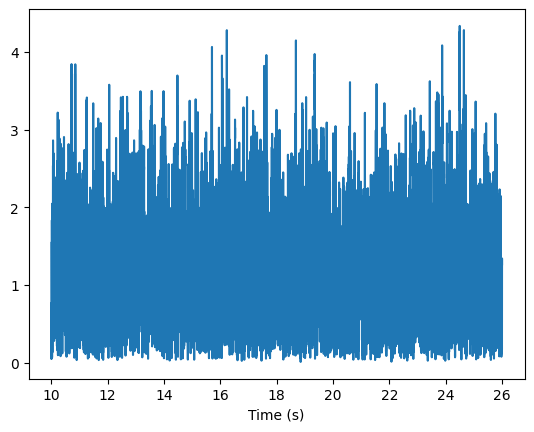

In [161]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [164]:
#GW200322_091133
#H
strain_H_event = TimeSeries(strain_H_data[83], delta_t=1.0/2048)
strain_H_event = strain_H_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_H_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_H_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_H_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 34
m2 = 14
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_H_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_H_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_H_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_H_event.start_time
subtracted = strain_H_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_H_values = []
strain_H_event_array = np.array(strain_H_event)


A signal was found at 17.93701171875s with SNR 4.622177792032401


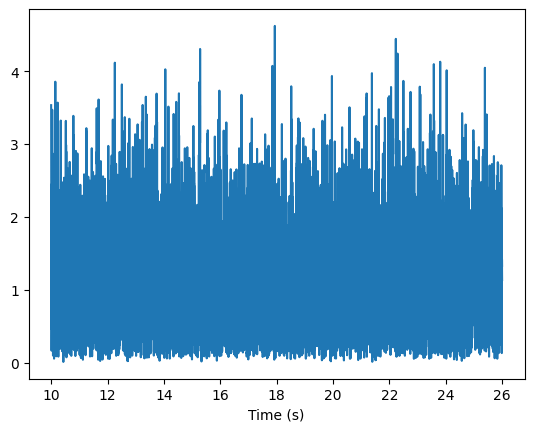

In [165]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

In [166]:
#GW200322_091133
#L
strain_L_event = TimeSeries(strain_L_data[86], delta_t=1.0/2048)
strain_L_event = strain_L_event.crop(2, 2) #se ostranuvaat po 2s na pochetokot i krajot za da se otstranat diskontinuitetite
psd = strain_L_event.psd(4) #presmetka na PSD se zemanje na primeroci po 4s preku Welch-ov metod
psd = interpolate(psd, strain_L_event.delta_f) #interpolacija na PSD za da ima match so event data
psd = inverse_spectrum_truncation(psd, int(4*strain_L_event.sample_rate), low_frequency_cutoff=15) #1/PSD e filter so efektivna dolzhina od 4, ne se zemaat frekv. pod 15 deka vrz signalot beshe izvrshen highpass filter
#generiranje na template za matched-filtering
m1 = 34
m2 = 14
hp, hc = get_td_waveform(approximant="SEOBNRv3",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_L_event.delta_t,
                     f_lower=20)
hp.resize(len(strain_L_event)) #se pravi resize za da ima match so data
template = hp.cyclic_time_shift(hp.start_time) #se pomestuva vremenski template za da bide vo ona vreme kade se sluchuva potencijalniot nastan
snr = matched_filter(template, strain_L_event, psd=psd, low_frequency_cutoff=20)
snr = snr.crop(4 + 4, 4) #se ostranuvaat po 4s na pochetok i kraj poradi diskont. od template i PSD filterot i dopolnitelni 4s na pochetokot za da se zeme vo predvid template length, za BNS signali bi trebalo povekje
snr_values = abs(snr).numpy()
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("A signal was found at {}s with SNR {}".format(time, abs(snrp)))
dt = time - strain_L_event.start_time #se pomestuva template na peak time
aligned = template.cyclic_time_shift(dt)
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0) #se skalira template da ima SNR 1
#se skaliraat template amplitudata i fazata kon peak vrednosta
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries() 
aligned.start_time = strain_L_event.start_time
subtracted = strain_L_event - aligned #se izdvojuva samo shumot
#zachuvuanje vo label_H
label_L_values = []
strain_L_event_array = np.array(strain_L_event)

A signal was found at 15.107421875s with SNR 4.188817469954243


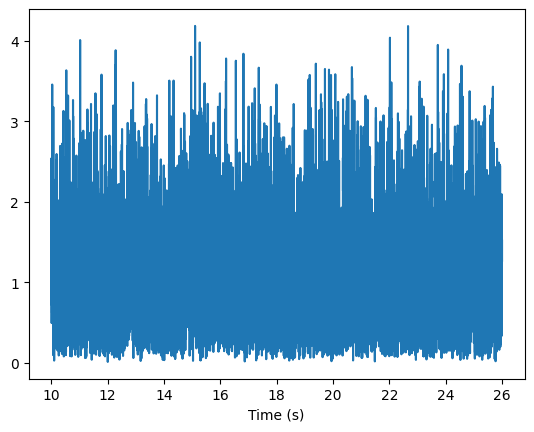

In [167]:
pylab.plot(abs(snr).sample_times, abs(snr))
pylab.xlabel('Time (s)')
pylab.show()

Се отфрла настанот.